In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/kaggle/input/titanic/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
data.isin([0]).sum()

PassengerId      0
Survived       549
Pclass           0
Name             0
Sex              0
Age              0
SibSp          608
Parch          678
Ticket           0
Fare            15
Cabin            0
Embarked         0
dtype: int64

In [8]:
# extracting salutations
data['salutations'] = data['Name'].str.extract('([A-Za-z]+)\.')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,salutations
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [9]:
data['salutations'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Lady          1
Capt          1
Mme           1
Sir           1
Jonkheer      1
Don           1
Ms            1
Countess      1
Name: salutations, dtype: int64

In [10]:
data['salutations'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)
data['salutations'].value_counts()

Mr        529
Miss      186
Mrs       127
Master     40
Other       9
Name: salutations, dtype: int64

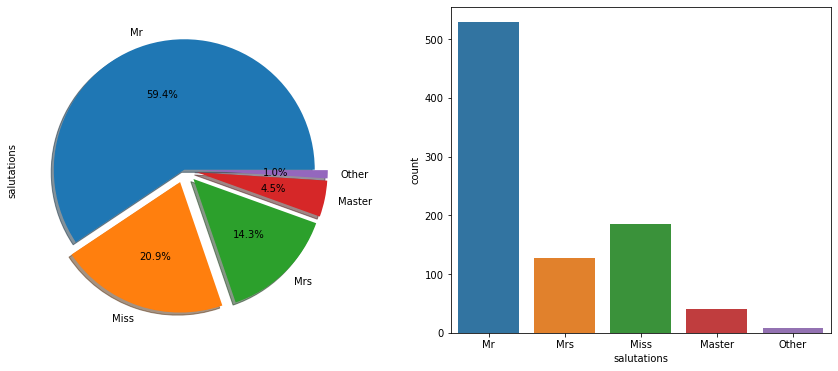

In [11]:
f,ax = plt.subplots(1,2, figsize = (15,6))
data['salutations'].value_counts().plot.pie(ax = ax[0], explode = [0,0.1,0.1,0.1,0.1], shadow = True, autopct = '%1.1f%%')
# ax[0].set_title('salutations')
sns.countplot(x = 'salutations', data = data, ax = ax[1])
plt.show()

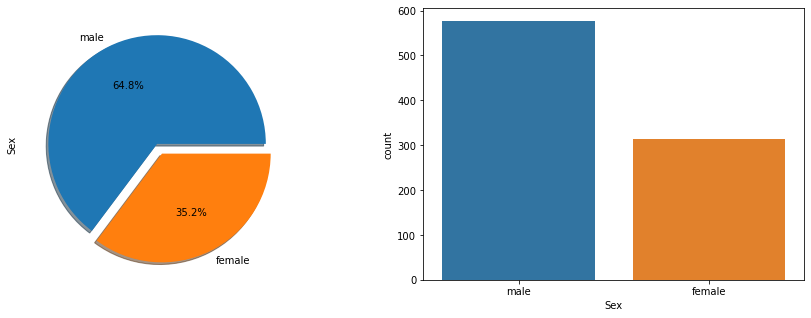

In [12]:
f,ax = plt.subplots(1,2, figsize = (15,5))
data['Sex'].value_counts().plot.pie(ax = ax[0], explode = [0,0.1], shadow = True, autopct = '%1.1f%%')
# ax[0].set_title('Sex')
sns.countplot(x = 'Sex', data = data, ax = ax[1])
plt.show()

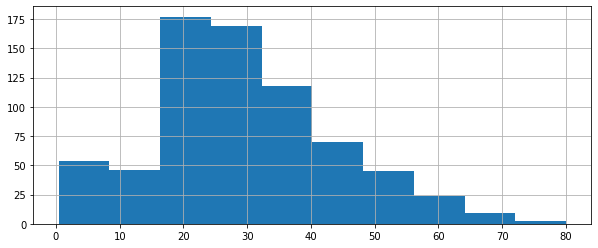

In [13]:
data['Age'].hist(figsize = (10,4))
plt.show()

In [14]:
# replacing null values in age column
data.groupby(['salutations'])['Age'].mean()

salutations
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [15]:
data[(data['salutations'] == 'Mr') & (data['Age'].isnull())]['Age']

5     NaN
17    NaN
26    NaN
29    NaN
36    NaN
       ..
839   NaN
846   NaN
859   NaN
868   NaN
878   NaN
Name: Age, Length: 120, dtype: float64

In [16]:
data.loc[(data.Age.isnull())&(data.salutations=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.salutations=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.salutations=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.salutations=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.salutations=='Other'),'Age']=46

In [17]:
data['Age'].isna().sum()

0

In [18]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'salutations'],
      dtype='object')

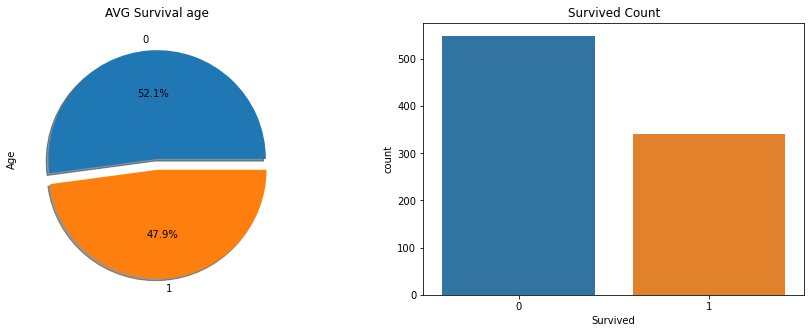

In [19]:
# average age of survived 
f,ax = plt.subplots(1,2, figsize = (15,5))
data.groupby('Survived')['Age'].mean().plot.pie(ax = ax[0], explode = [0,0.1], shadow = True, autopct = '%1.1f%%')
ax[0].set_title('AVG Survival age')
sns.countplot(x = 'Survived', data = data, ax = ax[1])
ax[1].set_title('Survived Count')
plt.show()

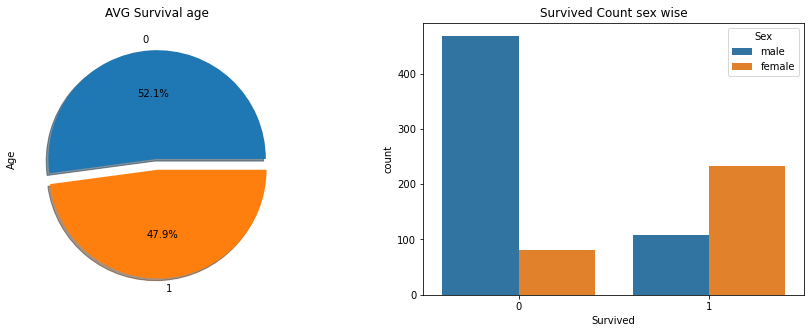

In [20]:
# average age of survived 
f,ax = plt.subplots(1,2, figsize = (15,5))
data.groupby('Survived')['Age'].mean().plot.pie(ax = ax[0], explode = [0,0.1], shadow = True, autopct = '%1.1f%%')
ax[0].set_title('AVG Survival age')
sns.countplot(x = 'Survived',hue = 'Sex', data = data, ax = ax[1])
ax[1].set_title('Survived Count sex wise')
plt.show()

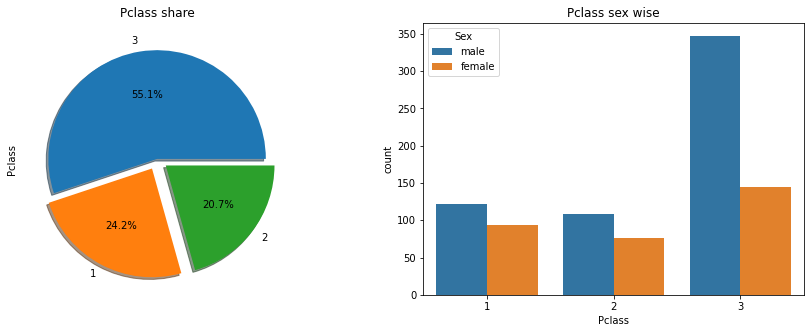

In [21]:
# average age of survived 
f,ax = plt.subplots(1,2, figsize = (15,5))
data['Pclass'].value_counts().plot.pie(ax = ax[0], explode = [0,0.1,0.1], shadow = True, autopct = '%1.1f%%')
ax[0].set_title('Pclass share')
sns.countplot(x = 'Pclass',hue = 'Sex', data = data, ax = ax[1])
ax[1].set_title('Pclass sex wise')
plt.show()

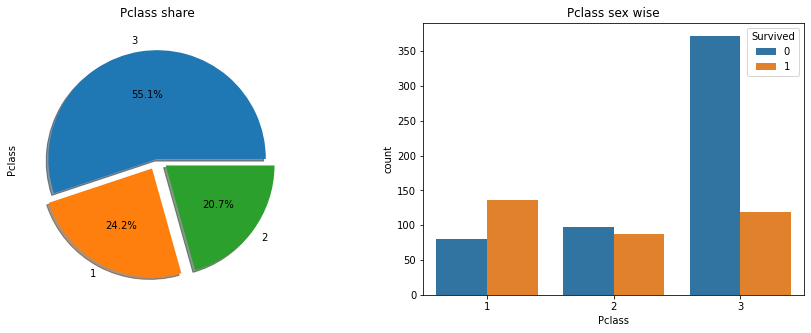

In [22]:
 
f,ax = plt.subplots(1,2, figsize = (15,5))
data['Pclass'].value_counts().plot.pie(ax = ax[0], explode = [0,0.1,0.1], shadow = True, autopct = '%1.1f%%')
ax[0].set_title('Pclass share')
sns.countplot(x = 'Pclass',hue = 'Survived', data = data, ax = ax[1])
ax[1].set_title('Pclass sex wise')
plt.show()

In [23]:
pd.crosstab(data['Pclass'], data['Sex']).T.style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


In [24]:
pd.crosstab(data['Sex'], data['Survived']).T.style.background_gradient(cmap='summer_r')

Sex,female,male
Survived,,
0,81,468
1,233,109


In [25]:
pd.crosstab(data['Pclass'], data['Survived']).T.style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


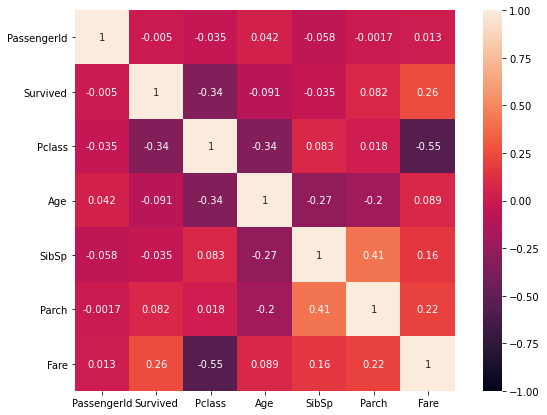

In [26]:
corrmat = data.corr()
fig = plt.figure(figsize = (10,7))
sns.heatmap(corrmat,vmax = 1,square = True,annot = True,vmin = -1)
plt.show()

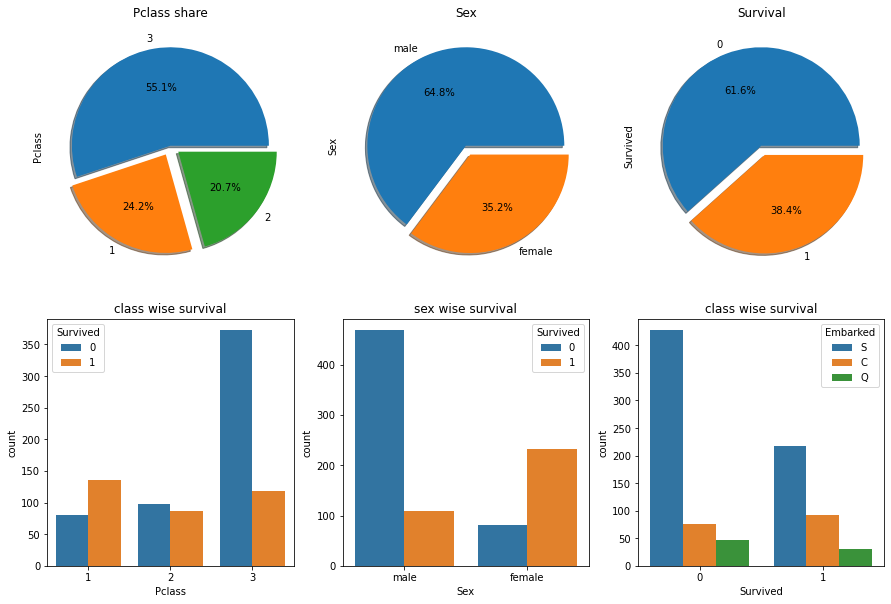

In [27]:

f,ax = plt.subplots(2,3, figsize = (15,10))
data['Pclass'].value_counts().plot.pie(ax = ax[0][0], explode = [0,0.1,0.1], shadow = True, autopct = '%1.1f%%')
ax[0][0].set_title('Pclass share')
data['Sex'].value_counts().plot.pie(ax = ax[0][1], explode = [0,0.1], shadow = True, autopct = '%1.1f%%')
ax[0][1].set_title('Sex')
data['Survived'].value_counts().plot.pie(ax = ax[0][2], explode = [0,0.1], shadow = True, autopct = '%1.1f%%')
ax[0][2].set_title('Survival')
sns.countplot(x = 'Pclass', hue = 'Survived', data = data, ax = ax[1][0])
ax[1][0].set_title('class wise survival')
sns.countplot(x = 'Sex', hue = 'Survived', data = data, ax = ax[1][1])
ax[1][1].set_title('sex wise survival')
sns.countplot(x = 'Survived', hue = 'Embarked', data = data, ax = ax[1][2])
ax[1][2].set_title('class wise survival')
plt.show()

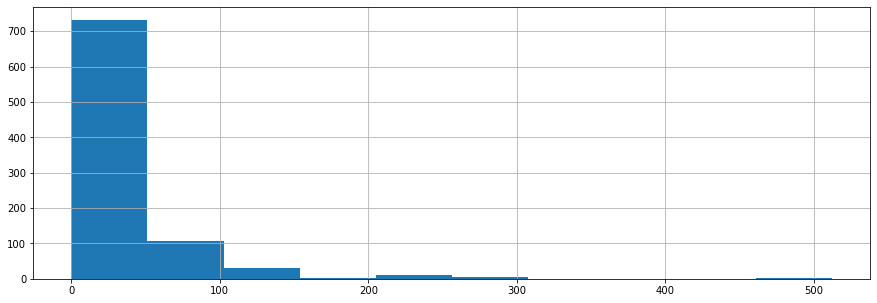

In [28]:
data['Fare'].hist(figsize = (15,5))
plt.show()

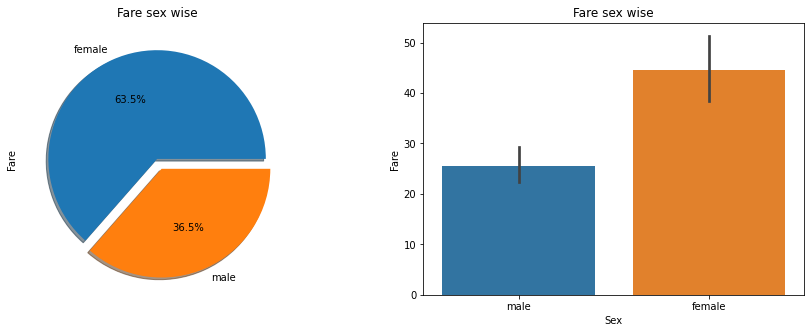

In [29]:
f,ax = plt.subplots(1,2, figsize = (15,5))
data.groupby(['Sex'])['Fare'].mean().plot.pie(ax = ax[0], explode = [0,0.1], shadow = True, autopct = '%1.1f%%')
ax[0].set_title('Fare sex wise')
sns.barplot(x = 'Sex',y = 'Fare',data = data, ax = ax[1])
ax[1].set_title('Fare sex wise')
plt.show()

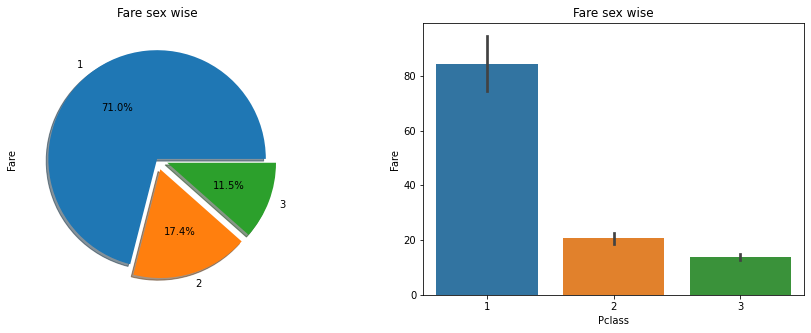

In [30]:
f,ax = plt.subplots(1,2, figsize = (15,5))
data.groupby(['Pclass'])['Fare'].mean().plot.pie(ax = ax[0], explode = [0,0.1,0.1], shadow = True, autopct = '%1.1f%%')
ax[0].set_title('Fare sex wise')
sns.barplot(x = 'Pclass',y = 'Fare',data = data, ax = ax[1])
ax[1].set_title('Fare sex wise')
plt.show()

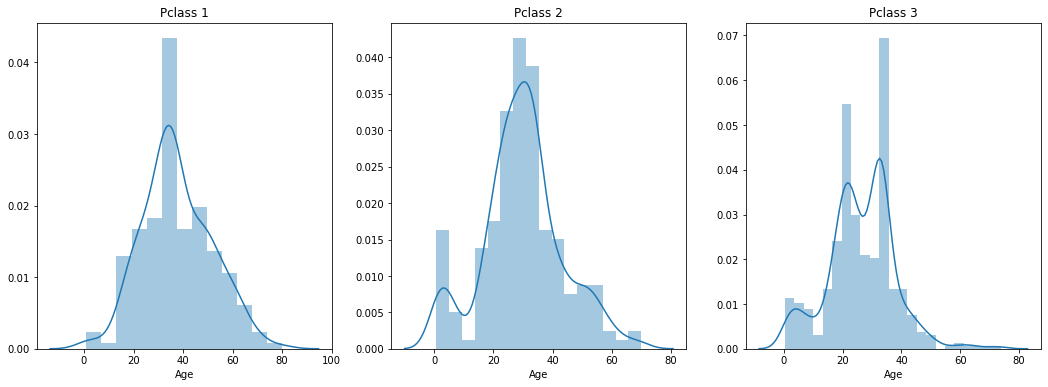

In [31]:
# Age trends
f, ax = plt.subplots(1,3, figsize = (18,6))
sns.distplot(data[data['Pclass'] == 1]['Age'], ax = ax[0])
ax[0].set_title('Pclass 1')
sns.distplot(data[data['Pclass'] == 2]['Age'], ax = ax[1])
ax[1].set_title('Pclass 2')
sns.distplot(data[data['Pclass'] == 3]['Age'], ax = ax[2])
ax[2].set_title('Pclass 3')
plt.show()

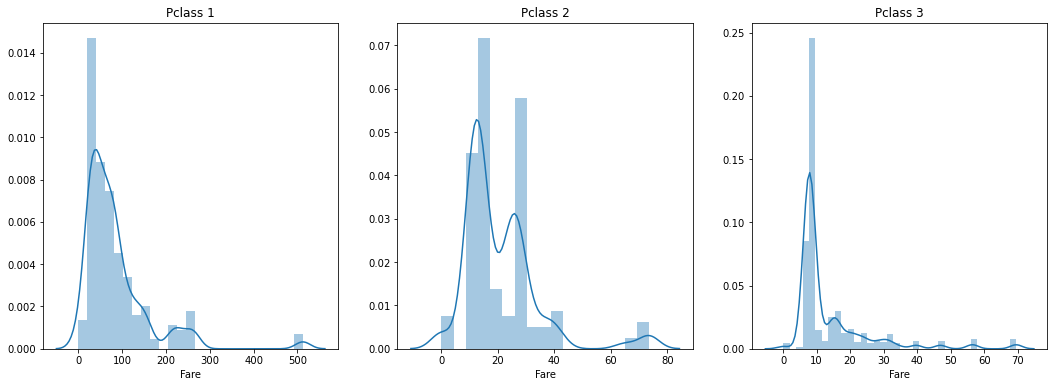

In [32]:
# fare trends
f, ax = plt.subplots(1,3, figsize = (18,6))
sns.distplot(data[data['Pclass'] == 1]['Fare'], ax = ax[0])
ax[0].set_title('Pclass 1')
sns.distplot(data[data['Pclass'] == 2]['Fare'], ax = ax[1])
ax[1].set_title('Pclass 2')
sns.distplot(data[data['Pclass'] == 3]['Fare'], ax = ax[2])
ax[2].set_title('Pclass 3')
plt.show()

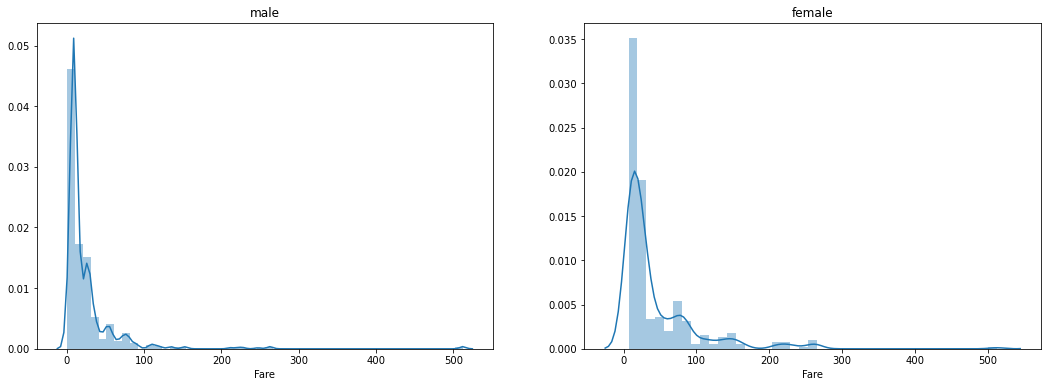

In [33]:
# fare trends
f, ax = plt.subplots(1,2, figsize = (18,6))
sns.distplot(data[data['Sex'] == 'male']['Fare'], ax = ax[0])
ax[0].set_title('male')
sns.distplot(data[data['Sex'] == 'female']['Fare'], ax = ax[1])
ax[1].set_title('female')
plt.show()